# Proyek Analisis Data: Bicycle Sharing Dataset
- **Nama:** Azzila Deswita Utami
- **Email:** m117d4kx2756@bangkit.academy | azziladeswita@gmail.com
- **ID Dicoding:** M117d4kx2756

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan tren penggunaan sepeda dari 2011 sampai 2013 ini?
- Apa musim (season) yang memiliki tingkat peminjaman sepeda tertinggi dan terendah?
- Apakah cuaca (weathersit) memengaruhi penggunaan sepeda?
- Apakah ada peningkatan dalam jumlah pengguna terdaftar (registered user) pertahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/azildest/dataset/main/Bicycle-Sharing-Dataset/day.csv")
day_df.head()
#mengambil dan membaca data day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/azildest/dataset/main/Bicycle-Sharing-Dataset/hour.csv")
hour_df.head()
#mengambil dan membaca data hour.csv

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Day.csv

In [4]:
day_df.info()
#melihat info dan tipe data
#dteday harusnya bertipe data datetime -> harus di clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()
#mengecek nilai yang kosong

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Duplicate: ", day_df.duplicated().sum())
#mengecek duplikasi

Duplicate:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hour.csv

In [8]:
hour_df.info()
#mengecek tipe data
#dteday ini juga harusnya bertipe datetime -> clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()
#mengecek apakah ada nilai yang hilang

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Duplicate: ", hour_df.duplicated().sum())
#mengecek nilai duplikat

Duplicate:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

day.csv

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

#mengganti tipe data dteday dari object ke datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

hour.csv

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()
#mengganti tipe data dteday dari object ke datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Day.csv

In [14]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

#gruping

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [15]:
day_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

In [16]:
day_df.groupby(by="weekday").agg({
    "dteday": "nunique",
    "holiday": "nunique",
    "workingday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday holiday workingday   cnt                                
        nunique nunique    nunique   max   min         mean          std
weekday                                                                 
0           105       1          1  8227   605  4228.828571  1872.496629
1           105       2          2  7525    22  4338.123810  1793.074013
2           104       2          2  7767   683  4510.663462  1826.911642
3           104       2          2  8173   441  4548.538462  2038.095884
4           104       2          2  7804   431  4667.259615  1939.433317
5           104       2          2  8362  1167  4690.288462  1874.624870
6           105       1          1  8714   627  4550.542857  2196.693009

In [17]:
day_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "temp": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
})

dteday      temp                              windspeed            \
           nunique       max      min      mean       std       max       min   
weathersit                                                                      
1              463  0.861667  0.05913  0.511541  0.191165  0.507463  0.022392   
2              247  0.815000  0.10750  0.470366  0.167180  0.414800  0.047275   
3               21  0.633913  0.21750  0.433440  0.131473  0.358200  0.097021   

                                
                mean       std  
weathersit                      
1           0.190253  0.077530  
2           0.186431  0.075331  
3           0.243336  0.086185

hour_csv

In [18]:
hour_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

#datanya hampir mirip.. merge?

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              700  977   1  204.869272  189.487773
2              567  957   1  175.165493  165.431589
3              300  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

In [19]:
#memutuskan untuk merge
day_hour_df = pd.merge(day_df, hour_df[['dteday', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']], on='dteday', how='right', suffixes=('_day', '_hour'))
day_hour_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp_day,atemp_day,...,casual_day,registered_day,cnt,hr,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,854.339720,3679.353242,4533.692963,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,685.686754,1544.953518,1917.376947,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,2.000000,20.000000,22.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,318.000000,2545.000000,3214.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,724.000000,3681.000000,4563.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,1100.000000,4801.000000,5986.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,3410.000000,6946.000000,8714.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000


In [20]:
day_hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp_day,...,casual_day,registered_day,cnt,hr,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,0,0.24,0.2879,0.81,0.0,3,13
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,1,0.22,0.2727,0.80,0.0,8,32
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,2,0.22,0.2727,0.80,0.0,5,27
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,3,0.24,0.2879,0.75,0.0,3,10
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,4,0.24,0.2879,0.75,0.0,0,1


In [21]:
day_hour_df.isna().sum()

instant            0
dteday             0
season             0
yr                 0
mnth               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt                0
hr                 0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
dtype: int64

In [22]:
print("Duplicate: ", day_hour_df.duplicated().sum())
#cek duplikasi
#AMANNNN

Duplicate:  0


In [45]:
day_hour_df.nunique()
#cek nilai unik

instant            731
dteday             731
season               4
yr                   2
mnth                12
holiday              2
weekday              7
workingday           2
weathersit           3
temp_day           499
atemp_day          690
hum_day            595
windspeed_day      650
casual_day         606
registered_day     679
cnt                696
hr                  24
temp_hour           50
atemp_hour          65
hum_hour            89
windspeed_hour      30
casual_hour        322
registered_hour    776
year                 2
month               12
dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan tren penggunaan sepeda dari 2011 sampai 2013 ini?


In [24]:
year_trend_df = day_hour_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})

year_trend_df['year'] = year_trend_df.index.year
year_trend_df['month'] = year_trend_df.index.month

year_trend_df = year_trend_df.reset_index()

year_trend_df.rename(columns={
    "instant": "days",
    "cnt": "total_rental"
}, inplace=True)

year_trend_df.head()

,dteday,days,total_rental,year,month
0,2011-01-31,31,870969,2011,1
1,2011-02-28,28,1119397,2011,2
2,2011-03-31,31,1511511,2011,3
3,2011-04-30,30,2273532,2011,4
4,2011-05-31,31,3259704,2011,5


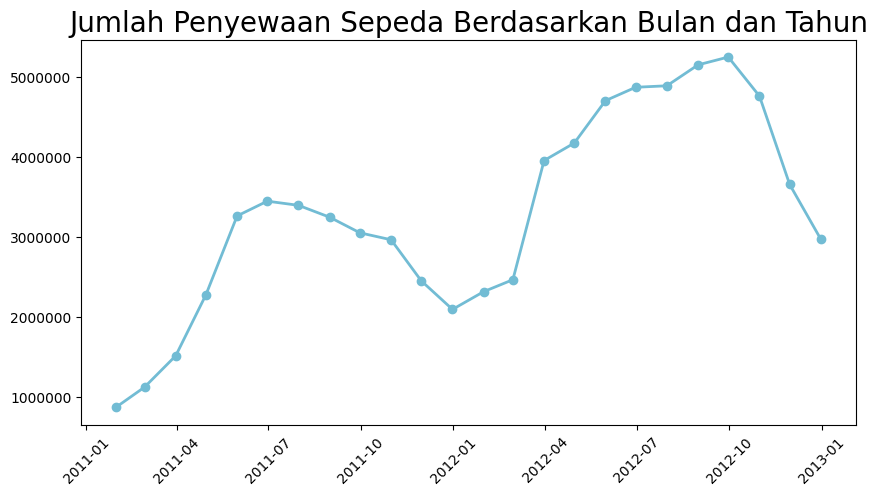

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    year_trend_df["dteday"],
    year_trend_df["total_rental"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)

ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title("Jumlah Penyewaan Sepeda Berdasarkan Bulan dan Tahun", loc="center", fontsize=20)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

Pada grafik ini kita dapat melihat bahwa sempat terjadi peningkatan pada awal tahun 2011 (tepatnya dari januari sampai agustus), namun perlahan menurun hingga ke 2012.

Pada tahun 2012 mulai terjadi peningkatan lagi sampai ke bulan oktober, sebelum akhirnya terjadi penurunan kembali.

### Pertanyaan 2: Apa musim (season) yang memiliki tingkat peminjaman sepeda tertinggi dan terendah?

In [26]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

day_hour_df['season'] = day_hour_df['season'].replace(season_mapping)

unique_dates_df = day_hour_df.drop_duplicates(subset='dteday')
sum_seasonal_rent_df = unique_dates_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()

sum_seasonal_rent_df.head(15)

,season,cnt
0,Summer,1061129
1,Spring,918589
2,Fall,841613
3,Winter,471348


<ipython-input-27-1ae1504045d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=sum_seasonal_rent_df.head(5), palette=colors, ax=ax[0])
<ipython-input-27-1ae1504045d6>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt", y="season", data=sum_seasonal_rent_df.head(5), palette=colors, ax=ax[0])
<ipython-input-27-1ae1504045d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=sum_seasonal_rent_df.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
<ipython-input-27-1ae1504045d6>:11: UserWarning: The palette list has more values (5) than needed (4), which

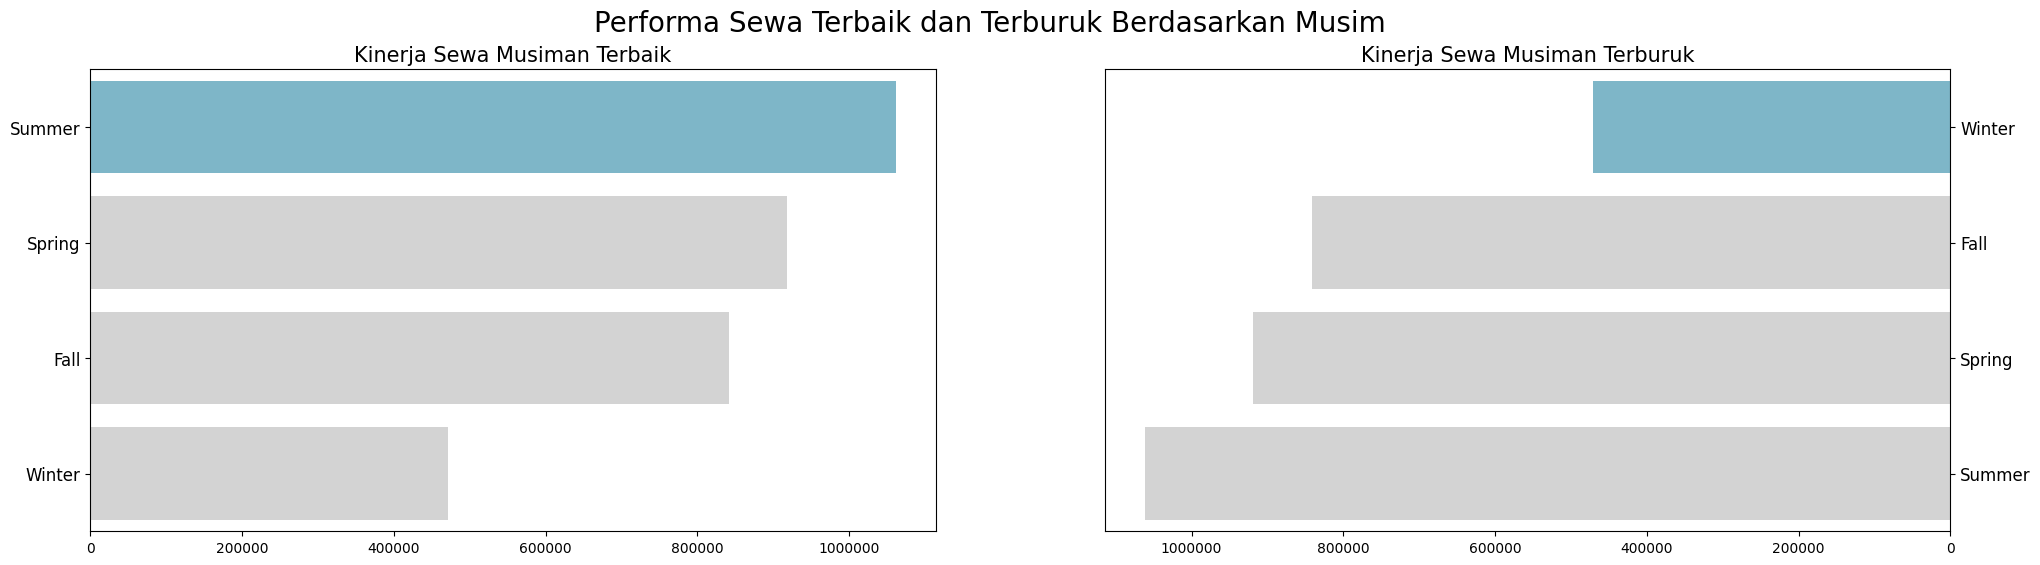

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="season", data=sum_seasonal_rent_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kinerja Sewa Musiman Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="season", data=sum_seasonal_rent_df.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kinerja Sewa Musiman Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

ax[0].get_xaxis().get_major_formatter().set_scientific(False)
ax[1].get_xaxis().get_major_formatter().set_scientific(False)

plt.suptitle("Performa Sewa Terbaik dan Terburuk Berdasarkan Musim", fontsize=20)
plt.show()

Pada grafik diatas, pada grafik pertama bisa dilihat bahwa Summer (musim panas) memiliki jumlah penyewaan sepeda tertinggi yang mencapai lebih dari 1 juta, sebaliknya pada grafik kedua jumlah terendah dimiliki oleh Winter (musim dingin) yaitu hanya lebih dari 4 ratus ribu saja.

### Pertanyaan 3: Apakah cuaca (weathersit) memengaruhi penggunaan sepeda?

Weather

In [39]:
weather_mapping = {1: 'Clear or Cloudy', 2: 'Mist', 3: 'Light Rain or Snow', 4: 'Heavy Rain or Snow'}

day_hour_df['weathersit'] = day_hour_df['weathersit'].replace(weather_mapping)

unique_dates_df = day_hour_df.drop_duplicates(subset='dteday')

weather_rent_df = unique_dates_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()
weather_rent_df.head(5)

,weathersit,cnt
0,Clear or Cloudy,2257952
1,Mist,996858
2,Light Rain or Snow,37869


<ipython-input-40-880fdae129dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_rent_df.head(5), palette=colors)
<ipython-input-40-880fdae129dd>:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x="weathersit", y="cnt", data=weather_rent_df.head(5), palette=colors)


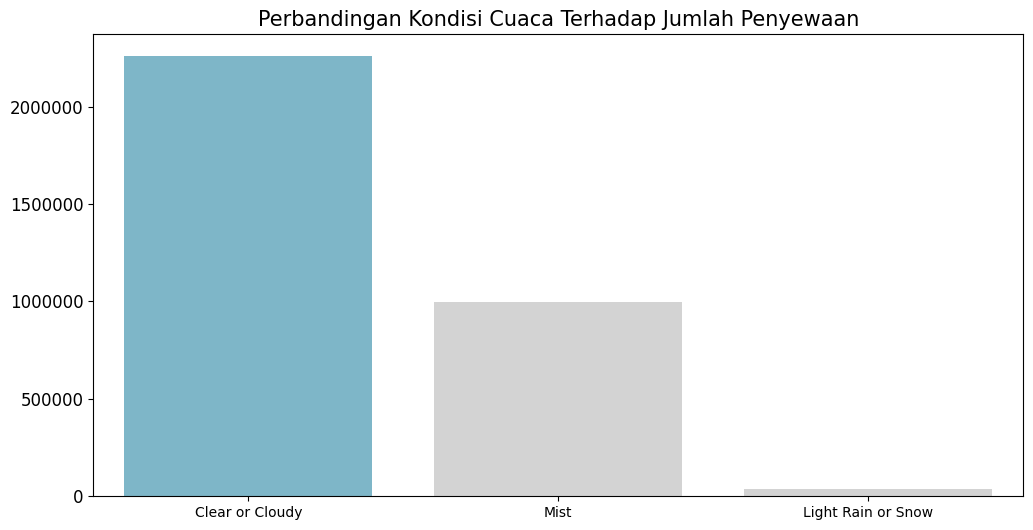

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="weathersit", y="cnt", data=weather_rent_df.head(5), palette=colors)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Perbandingan Kondisi Cuaca Terhadap Jumlah Penyewaan", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

ax.get_yaxis().get_major_formatter().set_scientific(False)

Grafik ini menunjukkan bahwa cuaca Clear or Cloudy (Cerah atau berawan) memiliki jumlah terbanyak, selisih dengan cuaca yang lainnya juga sangat jauh.

### Pertanyaan 4: Apakah ada peningkatan dalam jumlah pengguna terdaftar (registered user) pertahunnya?

In [30]:
day_hour_df['year'] = pd.to_datetime(day_hour_df['dteday']).dt.year
day_hour_df['month'] = pd.to_datetime(day_hour_df['dteday']).dt.month_name()

registered_trend = day_hour_df.groupby(['year', 'month'])['registered_day'].sum().reset_index()

registered_trend.head()

,year,month,registered_day
0,2011,April,1738083
1,2011,August,2562609
2,2011,December,1889615
3,2011,February,973236
4,2011,January,799718


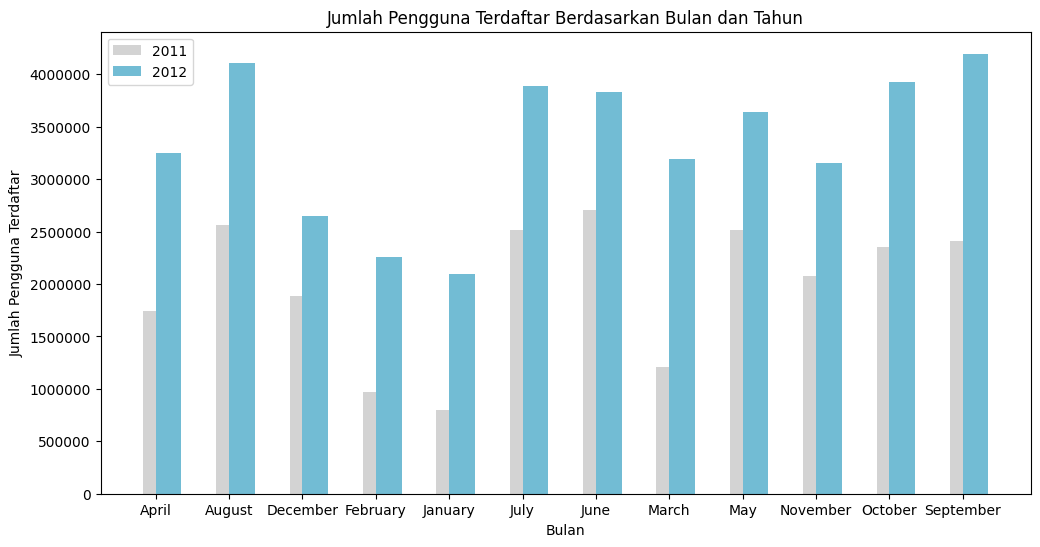

In [31]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

bar_2011 = plt.bar(registered_trend[registered_trend['year'] == 2011]['month'], registered_trend[registered_trend['year'] == 2011]['registered_day'], width=bar_width, label='2011', color='#D3D3D3')
bar_2012 = plt.bar(registered_trend[registered_trend['year'] == 2012]['month'], registered_trend[registered_trend['year'] == 2012]['registered_day'], width=bar_width, label='2012', color='#72BCD4', align='edge')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.title('Jumlah Pengguna Terdaftar Berdasarkan Bulan dan Tahun')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

In [41]:
#ini untuk download csv
day_hour_df.to_csv("day_hour.csv", index=False)

Pada grafik ini terdapat dua bar yang berbeda warna, kedua bar ini mewakili data dari grup tahun. Putih untuk 2011, dan biru untuk 2012. Dapat dilihat bahwa bar biru selalu melebihi bar putih, yang artinya jumlah registered user mengalami peningkatan pada bulan tersebut di tahun 2012.

## Conclusion

- Jumlah penyewaan sepeda terus mengalami peningkatan pada tahun 2012 jika dibandingkan dengan tahun 2011 dan 2013.
- Summer (musim panas) memiliki jumlah penyewaan paling banyak, sedangkan yang paling rendah adalah Winter (musim dingin).
- Ya, cuaca memengaruhi penggunaan sepeda. Orang-orang cenderung menyewa sepeda saat cuaca cerah atau berawan.
- Ya, jumlah registered users meningkat pada tahun 2012 dibandingkan dengan tahun 2011.